In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect("DataBases/podcast_kaggle.sqlite")


# Load the data into a DataFrame
categories_df = pd.read_sql_query("SELECT * from categories", con)

podcasts_df = pd.read_sql_query("SELECT * from podcasts", con)

runs_df = pd.read_sql_query("SELECT * from runs", con)

con.close()

In [2]:
categories_df

,podcast_id,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music
3,ad4f2bf69c72b8db75978423c25f379e,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts-design
...,...,...
70947,cf6e43ec4739235d68ed0b69b1604d65,society-culture
70948,b73527e94e7e0ce7fe546c818a471a2a,comedy
70949,cd2660463f3db26d95d341b74a9ffd9f,technology
70950,c52c7bc59903251a9b75b27d4ba64802,kids-family


In [3]:
podcasts_df

,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000aa69852b276565c4f5eb9cdd999b,1342447811,speedway-soccer,https://podcasts.apple.com/us/podcast/speedway...,Speedway Soccer
...,...,...,...,...,...
46660,fffe3f208a56dfecfaf6d0a7f8399d63,1420703219,how-travel-writers-self-publish,https://podcasts.apple.com/us/podcast/how-trav...,How Travel Writers Self-Publish
46661,fffeb7d6d05f2b4c600fbebc828ca656,1220681898,teddy-the-empress-cooking-the-queens,https://podcasts.apple.com/us/podcast/teddy-th...,TEDDY & THE EMPRESS: Cooking the Queens
46662,ffff5db4b5db2d860c49749e5de8a36d,384521934,frankenstein-or-the-modern-prometheus,https://podcasts.apple.com/us/podcast/frankens...,"Frankenstein, or the Modern Prometheus"
46663,ffff66f98c1adfc8d0d6c41bb8facfd0,1435731839,whos-bringing-wine,https://podcasts.apple.com/us/podcast/whos-bri...,Who’s Bringing Wine?


In [4]:
kaggleDF = podcasts_df.merge(categories_df, on = 'podcast_id').drop(columns = ['itunes_id','itunes_url', 'podcast_id', 'slug'])

In [5]:
kaggleDF.head(20)

,title,category
0,Scaling Global,business
1,Cornerstone Baptist Church of Orlando,christianity
2,Cornerstone Baptist Church of Orlando,religion-spirituality
3,Mystery: Dancing in the Dark,religion-spirituality
4,Mystery: Dancing in the Dark,spirituality
5,KTs Money Matters,business
6,KTs Money Matters,business-investing
7,Speedway Soccer,arts
8,"Bethany Baptist Church, Bellflower CA",christianity
9,"Bethany Baptist Church, Bellflower CA",religion-spirituality


In [6]:
kaggleDF['title']=kaggleDF['title'].str.lower()

In [93]:
podcast_ranking = pd.read_csv('DataBases/HistoricChartablePodcast.csv', delimiter=',')
podcast_ranking.head()

,creator,name,rank,rank_date
0,audiochuck,Crime Junkie,1,"Monday Feb 01–Sunday Feb 07, 2021"
1,The Daily Wire,The Ben Shapiro Show,2,"Monday Feb 01–Sunday Feb 07, 2021"
2,NBC News,Dateline NBC,3,"Monday Feb 01–Sunday Feb 07, 2021"
3,Earwolf & Jenna Fischer and Angela Kinsey,Office Ladies,4,"Monday Feb 01–Sunday Feb 07, 2021"
4,Westwood One Podcast Network / Dan Bongino,The Dan Bongino Show,5,"Monday Feb 01–Sunday Feb 07, 2021"


In [94]:
#change date to datetime format
podcast_ranking['rank_date']=podcast_ranking['rank_date'].str.slice(-12,).str.replace(",","")
podcast_ranking['rank_date']= pd.to_datetime(podcast_ranking['rank_date'], format= '%b %d %Y')
podcast_ranking.head(20)

,creator,name,rank,rank_date
0,audiochuck,Crime Junkie,1,2021-02-07
1,The Daily Wire,The Ben Shapiro Show,2,2021-02-07
2,NBC News,Dateline NBC,3,2021-02-07
3,Earwolf & Jenna Fischer and Angela Kinsey,Office Ladies,4,2021-02-07
4,Westwood One Podcast Network / Dan Bongino,The Dan Bongino Show,5,2021-02-07
5,Team Coco & Earwolf,Conan O’Brien Needs A Friend,6,2021-02-07
6,Freakonomics Radio + Stitcher,Freakonomics Radio,7,2021-02-07
7,"Rachel Maddow, MSNBC",The Rachel Maddow Show,8,2021-02-07
8,Incongruity,Sword and Scale,9,2021-02-07
9,Comedy Central & iHeartRadio,The Daily Show With Trevor Noah: Ears Edition,10,2021-02-07


In [95]:
podcast_ranking.tail(20)

,creator,name,rank,rank_date
1380,Studio71,Killer Instinct,181,2020-06-28
1381,Collected Company,The Command Zone,182,2020-06-28
1382,The Paragon Collective,RuPaul: What's The Tee with Michelle Visage,183,2020-06-28
1383,"MSNBC, Rachel Maddow",Bag Man,184,2020-06-28
1384,NaN,Business of Bouffe,185,2020-06-28
1385,iHeartRadio & The Dodo,An Animal Saved My Life,186,2020-06-28
1386,Starburns Audio,The Koy Pond with Jo Koy,187,2020-06-28
1387,Sportsnet,Hockey Central,188,2020-06-28
1388,NaN,Ao Ponto (podcast do jornal O Globo),189,2020-06-28
1389,Westwood One Podcast Network,Titus & Tate,190,2020-06-28


In [96]:
podcast_ranking['name']=podcast_ranking['name'].str.lower()
podcast_ranking.head()

,creator,name,rank,rank_date
0,audiochuck,crime junkie,1,2021-02-07
1,The Daily Wire,the ben shapiro show,2,2021-02-07
2,NBC News,dateline nbc,3,2021-02-07
3,Earwolf & Jenna Fischer and Angela Kinsey,office ladies,4,2021-02-07
4,Westwood One Podcast Network / Dan Bongino,the dan bongino show,5,2021-02-07


In [97]:
#join tables by podcast name

podcastDF = pd.merge(
    podcast_ranking,
    kaggleDF,
    how="left",
    left_on='name',
    right_on='title',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None).drop(columns = 'title')

podcastDF

,creator,name,rank,rank_date,category
0,Curiouscast,13 hours inside the nova scotia massacre,200,2021-02-07,NaN
1,Fréquence Moderne,2 heures de perdues,185,2021-02-07,NaN
2,Fréquence Moderne,2 heures de perdues,176,2020-11-08,NaN
3,Fréquence Moderne,2 heures de perdues,154,2020-10-04,NaN
4,Fréquence Moderne,2 heures de perdues,158,2020-09-27,NaN
...,...,...,...,...,...
1550,NaN,聽天下：天下雜誌podcast,117,2020-09-06,NaN
1551,NaN,聽故事學英文,76,2021-02-07,NaN
1552,NaN,英文單字，片語，文法,170,2020-09-06,NaN
1553,NaN,通勤十分鐘 on the way to work,191,2020-09-27,NaN


In [98]:
podcastDF['category'].value_counts()

society-culture                      96
comedy                               76
business                             37
education                            33
arts                                 22
technology                           21
arts-food                            17
religion-spirituality                13
business-investing                   13
society-culture-personal-journals    13
spirituality                         12
tv-film                              11
christianity                          8
society-culture-places-travel         7
business-careers                      5
music                                 4
society-culture-philosophy            4
arts-performing-arts                  2
kids-family                           1
Name: category, dtype: int64

In [71]:
#For the podcasts that have more than one category/genre listed
podcastDF_genre = podcastDF.copy()
# Split the genres column using '-'
podcastDF_genre['category'] = podcastDF_genre['category'].apply(lambda x: x.split('-'))

In [72]:
# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in podcastDF_genre['category']:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'category'])

In [73]:
podcastDF_genre = pd.merge(podcastDF_genre.drop('category', axis=1), genre, how='right', left_index=True, right_on='index')#.dropna(axis=0)
podcastDF_genre.head(10)

,creator,name,rank,rank_date,index,category
0,NaN,almost 30,175,2020-10-04,0,education
1,NaN,almost 30,175,2020-10-04,1,religion
2,NaN,almost 30,175,2020-10-04,1,spirituality
3,NaN,almost 30,175,2020-10-04,2,spirituality
4,NaN,almost 30,181,2020-09-27,3,education
5,NaN,almost 30,181,2020-09-27,4,religion
6,NaN,almost 30,181,2020-09-27,4,spirituality
7,NaN,almost 30,181,2020-09-27,5,spirituality
8,NaN,almost 30,169,2020-09-06,6,education
9,NaN,almost 30,169,2020-09-06,7,religion


In [74]:
podcastDF_genre.drop_duplicates(subset= ['name', 'rank_date', 'category'], inplace = True)
podcastDF_genre.head(10)

,creator,name,rank,rank_date,index,category
0,NaN,almost 30,175,2020-10-04,0,education
1,NaN,almost 30,175,2020-10-04,1,religion
2,NaN,almost 30,175,2020-10-04,1,spirituality
4,NaN,almost 30,181,2020-09-27,3,education
5,NaN,almost 30,181,2020-09-27,4,religion
6,NaN,almost 30,181,2020-09-27,4,spirituality
8,NaN,almost 30,169,2020-09-06,6,education
9,NaN,almost 30,169,2020-09-06,7,religion
10,NaN,almost 30,169,2020-09-06,7,spirituality
12,NaN,almost 30,140,2020-07-12,9,education


In [75]:
podcastDF_genre = podcastDF_genre.rename(columns={'category': 'genres'})

In [76]:
podcastDF_genre.describe()

,rank,index
count,524.000000,524.000000
mean,84.442748,200.066794
std,56.973867,114.632213
min,4.000000,0.000000
25%,32.000000,102.750000
50%,76.000000,197.500000
75%,129.000000,296.250000
max,199.000000,394.000000


In [77]:
podcastDF_genre['genres'].value_counts()

culture         96
society         96
comedy          76
business        37
education       33
arts            22
technology      21
food            17
religion        13
spirituality    13
journals        13
personal        13
investing       13
tv              11
film            11
christianity     8
places           7
travel           7
careers          5
philosophy       4
music            4
performing       2
kids             1
family           1
Name: genres, dtype: int64

In [99]:
#Add this from Apple Podcast list of true crime
trueCrime = pd.read_csv('DataBases/trueCrimePodcasts.csv', delimiter=',')
trueCrime['name'] = trueCrime['name'].str.lower()
trueCrime['genres'] = 'crime'

trueCrime.head()

,name,genres
0,lisk: long island serial killer,crime
1,southern fried true crime,crime
2,morally indefensible,crime
3,true crime obsessed,crime
4,female criminals,crime


In [100]:
#Add this from Apple Podcast list
drama = pd.read_csv('DataBases/DramaPodcasts.csv', delimiter=',')
drama['name'] = drama['name'].str.lower()
drama['genres'] = 'drama'

drama.head()

,name,genres
0,mobigeno,drama
1,surreal love,drama
2,the bright sessions,drama
3,borrasca,drama
4,the seventh daughter,drama


In [101]:
#Add this from Apple Podcast list
scifi = pd.read_csv('DataBases/SciFiPodcasts.csv', delimiter=',')
scifi['name'] = scifi['name'].str.lower()
scifi['genres'] = 'sci-fi'

scifi.head()

,name,genres
0,continuum force,sci-fi
1,the orphans,sci-fi
2,into the mother lands,sci-fi
3,starcalled,sci-fi
4,dust,sci-fi


In [102]:
#Add this from Apple Podcast list
documentary = pd.read_csv('DataBases/DocumentaryPodcasts.csv', delimiter=',')
documentary ['name'] = scifi['name'].str.lower()
documentary ['genres'] = 'documentary'

documentary .head()

,name,genres
0,continuum force,documentary
1,the orphans,documentary
2,into the mother lands,documentary
3,starcalled,documentary
4,dust,documentary


In [103]:
genres_lst = [ documentary, drama, scifi , trueCrime]
genresDF = pd.concat(genres_lst)
genresDF

,name,genres
0,continuum force,documentary
1,the orphans,documentary
2,into the mother lands,documentary
3,starcalled,documentary
4,dust,documentary
...,...,...
235,the thing about pam,crime
236,the daily crime,crime
237,court tv podcast,crime
238,true crime all the time unsolved,crime


In [104]:
#merge genresDF with podcastDF 
podcastDF2_genre = pd.merge(
    podcastDF_genre,
    genresDF,
    how="left",
    on=['name'])
podcastDF2_genre

,creator,name,rank,rank_date,index,genres_x,genres_y
0,NaN,almost 30,175,2020-10-04,0,education,NaN
1,NaN,almost 30,175,2020-10-04,1,religion,NaN
2,NaN,almost 30,175,2020-10-04,1,spirituality,NaN
3,NaN,almost 30,181,2020-09-27,3,education,NaN
4,NaN,almost 30,181,2020-09-27,4,religion,NaN
...,...,...,...,...,...,...,...
519,NaN,zane and heath: unfiltered,18,2020-06-28,392,comedy,NaN
520,NaN,zane and heath: unfiltered,18,2020-06-28,393,society,NaN
521,NaN,zane and heath: unfiltered,18,2020-06-28,393,culture,NaN
522,NaN,zane and heath: unfiltered,18,2020-06-28,394,personal,NaN


In [105]:
podcastDF2_genre['genres_y'].value_counts()

crime    14
Name: genres_y, dtype: int64

In [106]:
podcastDF2_genre['genres'] = podcastDF2_genre[['genres_x', 'genres_y']].values.tolist()

In [107]:
podcastDF2_genre = podcastDF2_genre.drop(columns =['genres_x', 'genres_y'])

In [108]:
podcastDF2_genre

,creator,name,rank,rank_date,index,genres
0,NaN,almost 30,175,2020-10-04,0,"[education, nan]"
1,NaN,almost 30,175,2020-10-04,1,"[religion, nan]"
2,NaN,almost 30,175,2020-10-04,1,"[spirituality, nan]"
3,NaN,almost 30,181,2020-09-27,3,"[education, nan]"
4,NaN,almost 30,181,2020-09-27,4,"[religion, nan]"
...,...,...,...,...,...,...
519,NaN,zane and heath: unfiltered,18,2020-06-28,392,"[comedy, nan]"
520,NaN,zane and heath: unfiltered,18,2020-06-28,393,"[society, nan]"
521,NaN,zane and heath: unfiltered,18,2020-06-28,393,"[culture, nan]"
522,NaN,zane and heath: unfiltered,18,2020-06-28,394,"[personal, nan]"


In [109]:
# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in podcastDF2_genre['genres']:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre2 = pd.DataFrame(list_, columns=['index', 'genres'])

In [110]:
podcastDF2_genre = pd.merge(podcastDF2_genre.drop('genres', axis=1), genre2, how='right', left_index=True, right_on='index').dropna(subset=['genres'])
podcastDF2_genre.head(10)

,index,creator,name,rank,rank_date,index_x,index_y,genres
0,0,NaN,almost 30,175,2020-10-04,0,0,education
2,1,NaN,almost 30,175,2020-10-04,1,1,religion
4,2,NaN,almost 30,175,2020-10-04,1,2,spirituality
6,3,NaN,almost 30,181,2020-09-27,3,3,education
8,4,NaN,almost 30,181,2020-09-27,4,4,religion
10,5,NaN,almost 30,181,2020-09-27,4,5,spirituality
12,6,NaN,almost 30,169,2020-09-06,6,6,education
14,7,NaN,almost 30,169,2020-09-06,7,7,religion
16,8,NaN,almost 30,169,2020-09-06,7,8,spirituality
18,9,NaN,almost 30,140,2020-07-12,9,9,education


In [111]:
podcastDF2_genre.drop(columns=['index','index_x','index_y'], inplace = True)

In [112]:
podcastDF2_genre['genres'].value_counts()

society         96
culture         96
comedy          76
business        37
education       33
arts            22
technology      21
food            17
crime           14
journals        13
investing       13
personal        13
religion        13
spirituality    13
tv              11
film            11
christianity     8
travel           7
places           7
careers          5
philosophy       4
music            4
performing       2
kids             1
family           1
Name: genres, dtype: int64

In [121]:
#society always comes with culture and religion with spirituality, so delete them
podcastDF2_genre = podcastDF2_genre[podcastDF2_genre['genres'] != 'society']
podcastDF2_genre = podcastDF2_genre[podcastDF2_genre['genres'] != 'religion']

,creator,name,rank,rank_date,genres
0,NaN,almost 30,175,2020-10-04,education
4,NaN,almost 30,175,2020-10-04,spirituality
6,NaN,almost 30,181,2020-09-27,education
10,NaN,almost 30,181,2020-09-27,spirituality
12,NaN,almost 30,169,2020-09-06,education
...,...,...,...,...,...
1036,NaN,zane and heath: unfiltered,19,2020-07-12,journals
1038,NaN,zane and heath: unfiltered,18,2020-06-28,comedy
1042,NaN,zane and heath: unfiltered,18,2020-06-28,culture
1044,NaN,zane and heath: unfiltered,18,2020-06-28,personal


In [122]:
pod_genres_plot = podcastDF2_genre.groupby('genres').size().reset_index(name='count').sort_values('count', ascending=False)

pod_genres_plot

,genres,count
6,culture,96
4,comedy,76
1,business,37
7,education,33
0,arts,22
20,technology,21
10,food,17
5,crime,14
19,spirituality,13
16,personal,13


In [123]:
import seaborn as sns
sns.set_theme(style="whitegrid")

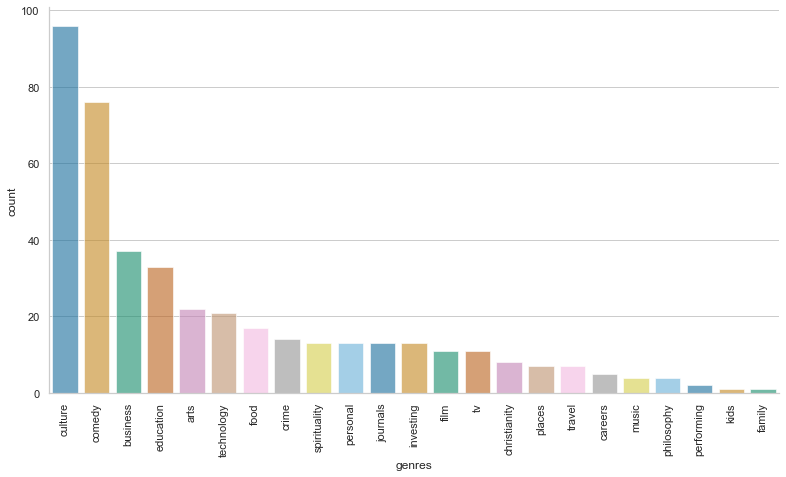

In [124]:
sns.catplot(
    data=pod_genres_plot, kind="bar",
    x="genres", y="count", palette="colorblind", alpha=.6, height=6, aspect=15/8.27).set_xticklabels(rotation=90)

In [125]:
podcastDF2_genre.to_csv(r'./DataBases/clean_podcast_genres.csv', index = False)